This dedicated to cleaning the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train = pd.read_csv('../rossmann-store-sales/train.csv')
store = pd.read_csv('../rossmann-store-sales/store.csv')

# Merge datasets for analysis
df = pd.merge(train, store, on='Store', how='left')

# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Fill missing values
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median(), inplace=True)
df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].median(), inplace=True)

# Handle datetime column
df['Date'] = pd.to_datetime(df['Date'])

# Feature extraction from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Verify clean data
print(df.head())


C:\Users\user\AppData\Local\Temp\ipykernel_32132\1521029519.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../rossmann-store-sales/train.csv')


CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_32132\1521029519.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_32132\1521029519.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-07-31   5263        555     1      1            0   
1      2          4 2015-07-31   6064        625     1      1            0   
2      3          4 2015-07-31   8314        821     1      1            0   
3      4          4 2015-07-31  13995       1498     1      1            0   
4      5          4 2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0              1         c  ...                       9.0   
1              1         a  ...                      11.0   
2              1         a  ...                      12.0   
3              1         c  ...                       9.0   
4              1         a  ...                       4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN           2012.0   
1                 

in this task i visualized the cleaned data

in the visualized data it points that as there is more promotion there is the sales increases,
or that as the season changes the sales also changes
or that as custoumer increases the sales also increase as it is represented in the scater plot

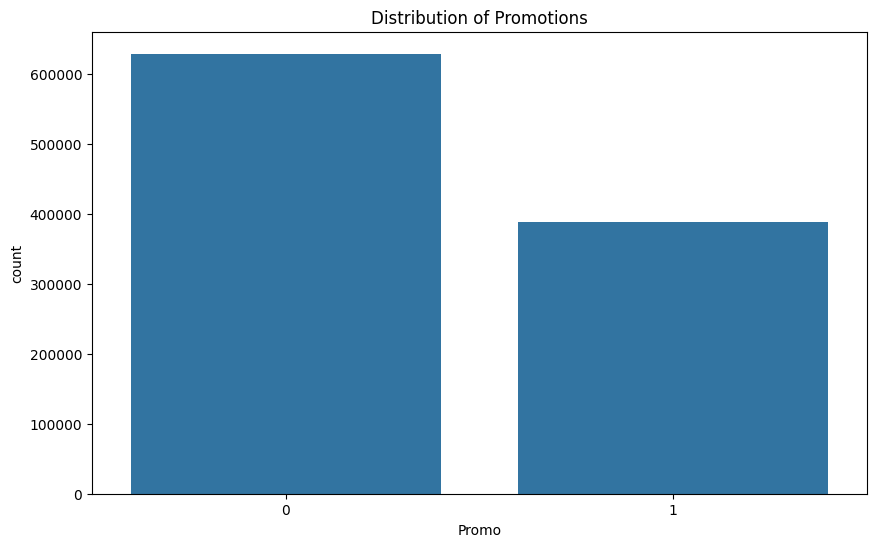

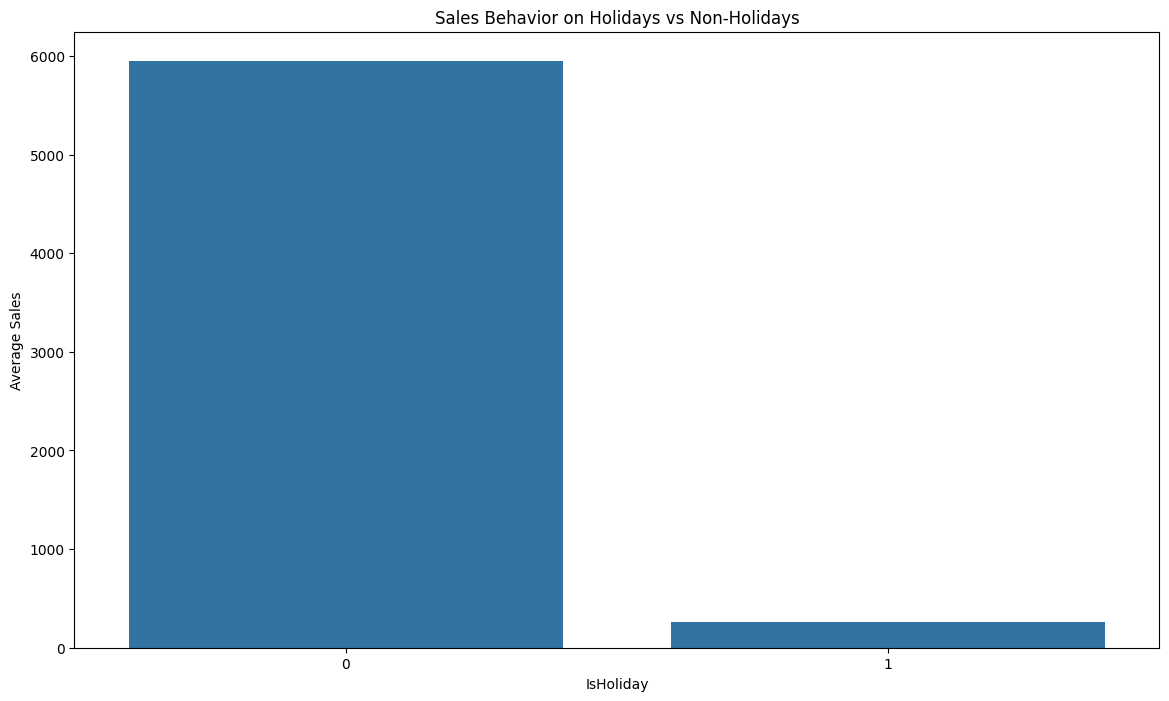

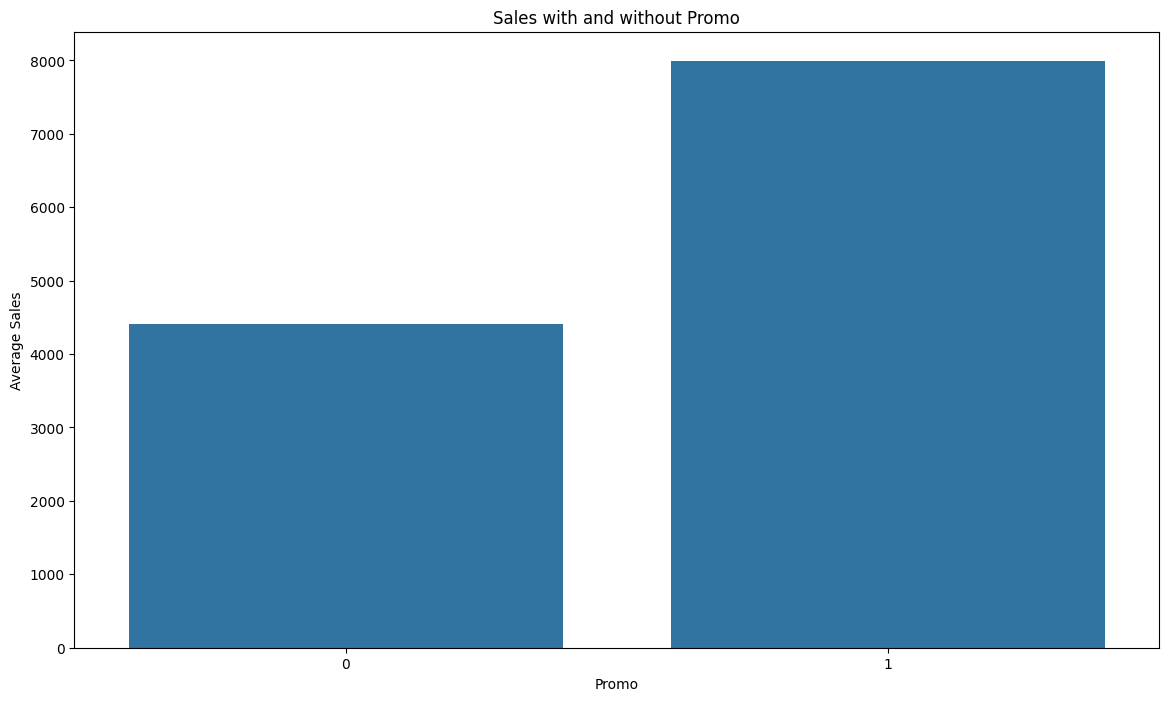

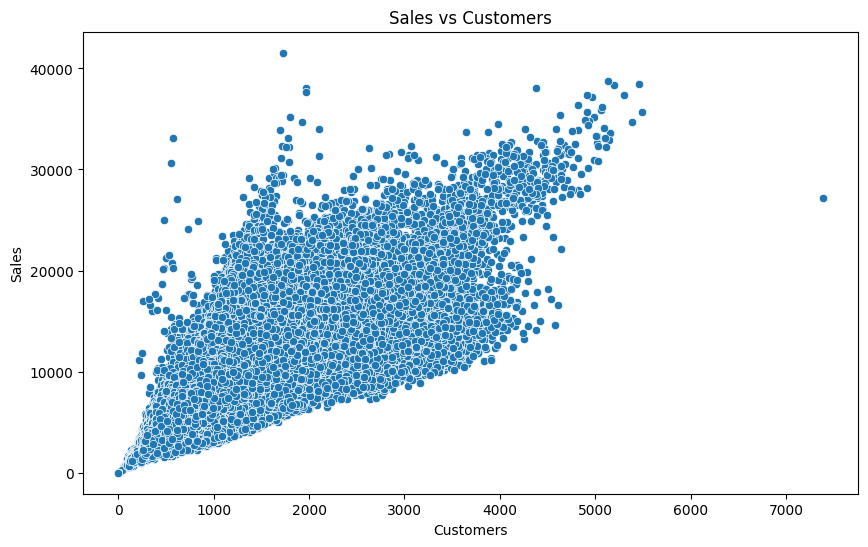

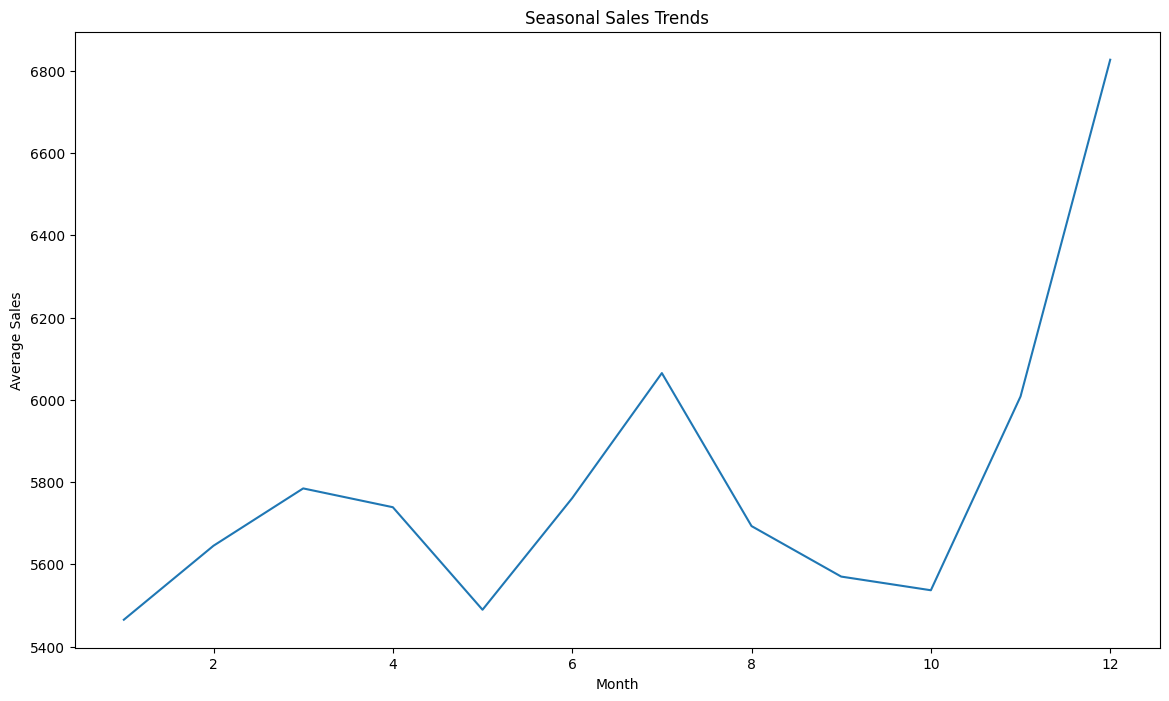

In [3]:
# Check distribution of promotions between train and test sets
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=df)
plt.title('Distribution of Promotions')
plt.show()

# Sales behavior before, during, and after holidays
plt.figure(figsize=(14, 8))
df['IsHoliday'] = df['StateHoliday'].apply(lambda x: 1 if x in ['a', 'b', 'c'] else 0)
holiday_sales = df.groupby('IsHoliday')['Sales'].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Sales Behavior on Holidays vs Non-Holidays')
plt.ylabel('Average Sales')
plt.show()

# Analyze the effect of promos on sales
plt.figure(figsize=(14, 8))
promo_sales = df.groupby('Promo')['Sales'].mean()
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Sales with and without Promo')
plt.ylabel('Average Sales')
plt.show()

# Correlation between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=df)
plt.title('Sales vs Customers')
plt.show()

# Seasonal trends in sales
plt.figure(figsize=(14, 8))
seasonal_sales = df.groupby('Month')['Sales'].mean()
sns.lineplot(x=seasonal_sales.index, y=seasonal_sales.values)
plt.title('Seasonal Sales Trends')
plt.ylabel('Average Sales')
plt.show()


in this specific code i try to drop unwanted columns and scale the data for the next step

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df.drop(['Date', 'StateHoliday'], axis=1)
df = pd.get_dummies(df, columns=['StoreType', 'Assortment'], drop_first=True)

# Splitting into train/test sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example of one-hot encoding the 'Month' column
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Making sure X_train and X_test have the same columns after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


in this specific what would be the prediction marginal error will be by using root mean squared to the whold data set and rmse is 439.8749614864541 which is relatively small from the data set perspective

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Building and traing the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 439.8749614864541


i commented this out so it can't duplicate file but overall this code is time stamping the data

In [6]:
#import joblib
#from datetime import datetime

# Saving the model with a timestamp
#timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
#joblib.dump(model, f'rossmann_model_{timestamp}.pkl')


in this section i used Long Short term model and reshaped the data to fit it

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sort by date and use sales for LSTM
df_lstm = df.sort_values(by='Year')
sales_data = df_lstm[['Sales']].values

# Scale sales data between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
sales_scaled = scaler.fit_transform(sales_data)

# Create time-series dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 30
X_lstm, y_lstm = create_dataset(sales_scaled, time_step)

# Reshape data for LSTM input
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))


in this section i built the LSTM model and trained it

on the next step i tried to use flask to print the prediction on sale

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_lstm.fit(X_lstm, y_lstm, epochs=10, batch_size=64, verbose=1)


c:\Users\user\Desktop\programming\python lr\challenge 4\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 380s 24ms/step - loss: 0.0181
Epoch 2/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 406s 26ms/step - loss: 0.0164
Epoch 3/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 280s 18ms/step - loss: 0.0162
Epoch 4/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 296s 19ms/step - loss: 0.0159
Epoch 5/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 298s 19ms/step - loss: 0.0159
Epoch 6/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 297s 19ms/step - loss: 0.0157
Epoch 7/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 294s 18ms/step - loss: 0.0155
Epoch 8/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 294s 18ms/step - loss: 0.0154
Epoch 9/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 297s 19ms/step - loss: 0.0151
Epoch 10/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 302s 19ms/step - loss: 0.0150
